In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

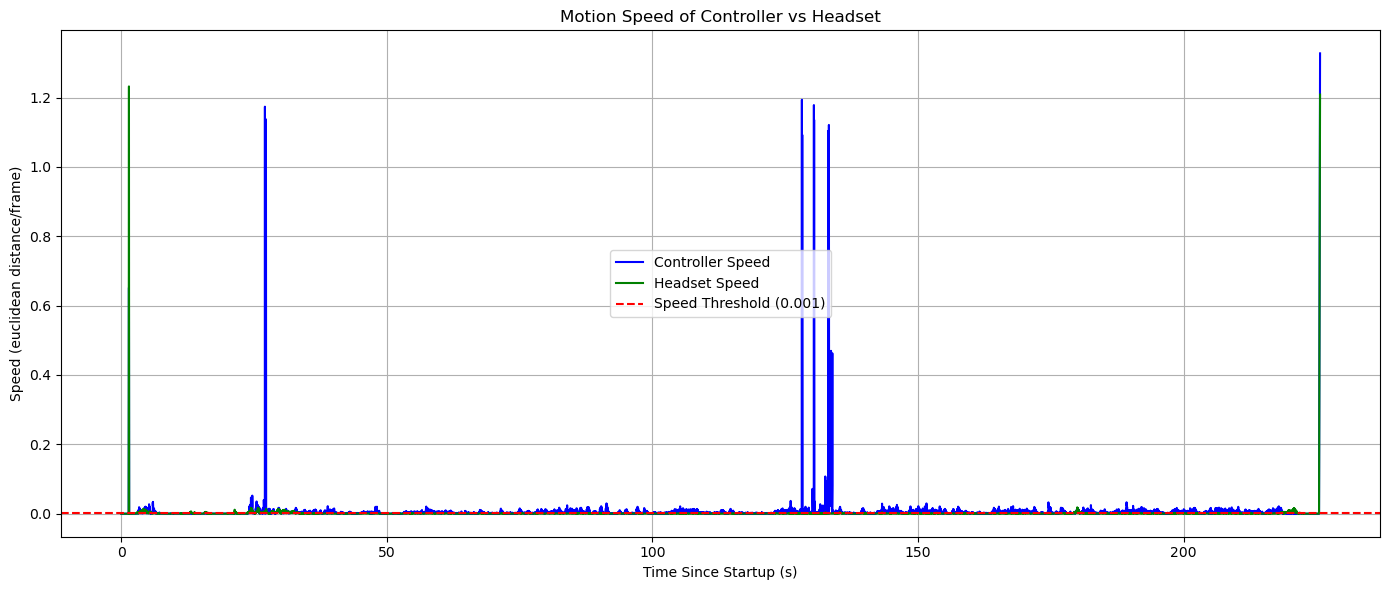

In [63]:
df = pd.read_csv("RightControllerData_20250721_144112.csv")

# --------- Controller Speed ----------
df["ctrl_dx"] = df["ControllerPosX"].diff()
df["ctrl_dy"] = df["ControllerPosY"].diff()
df["ctrl_dz"] = df["ControllerPosZ"].diff()
df["controller_speed"] = np.sqrt(df["ctrl_dx"]**2 + df["ctrl_dy"]**2 + df["ctrl_dz"]**2)

# --------- Headset Speed ----------
df["head_dx"] = df["HeadsetPosX"].diff()
df["head_dy"] = df["HeadsetPosY"].diff()
df["head_dz"] = df["HeadsetPosZ"].diff()
df["headset_speed"] = np.sqrt(df["head_dx"]**2 + df["head_dy"]**2 + df["head_dz"]**2)

# --------- Plot ----------
plt.figure(figsize=(14, 6))
plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Controller Speed", color='blue')
plt.plot(df["TimeSinceStartup"], df["headset_speed"], label="Headset Speed", color='green')
plt.axhline(0.001, color='red', linestyle='--', label='Speed Threshold (0.001)')
plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance/frame)")
plt.title("Motion Speed of Controller vs Headset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ControllerRotZ,ControllerRotW,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
2,3,0.35333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,4,0.59119,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
4,5,0.61845,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,0.87111,...,-0.64859,0.75834,0.00000,0.00000,0.00000,0.000000,0.00008,-0.00002,-0.00002,0.000085
10716,10717,225.46130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,0.87111,...,-0.64861,0.75832,0.00000,0.00000,0.00000,0.000000,0.00013,0.00001,-0.00001,0.000131
10717,10718,225.48800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,0.87111,...,-0.64861,0.75832,0.00000,0.00000,0.00000,0.000000,0.00004,0.00008,-0.00001,0.000090
10718,10719,225.50510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,0.87111,...,-0.64860,0.75833,0.00000,0.00000,0.00000,0.000000,0.00015,0.00006,-0.00004,0.000166


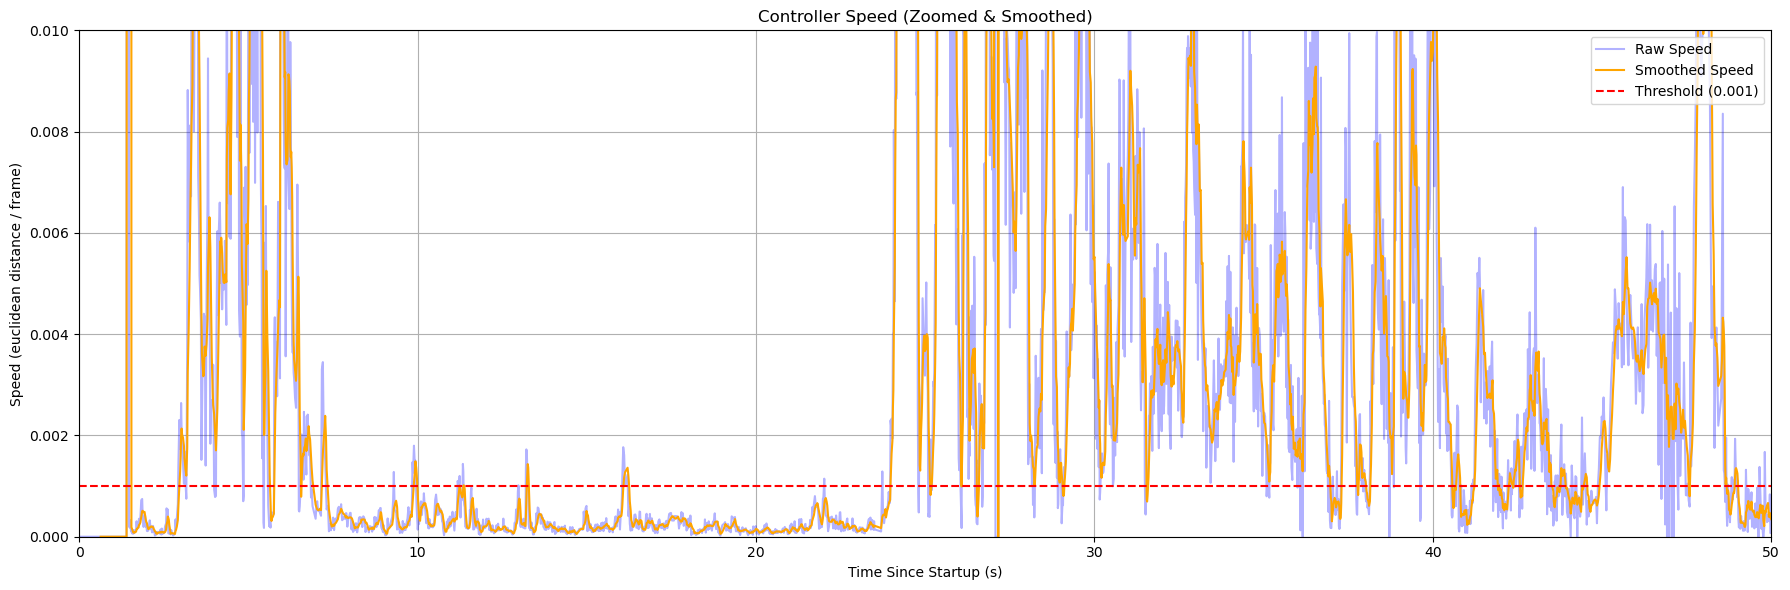

In [65]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

# Threshold
plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(0, 50)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

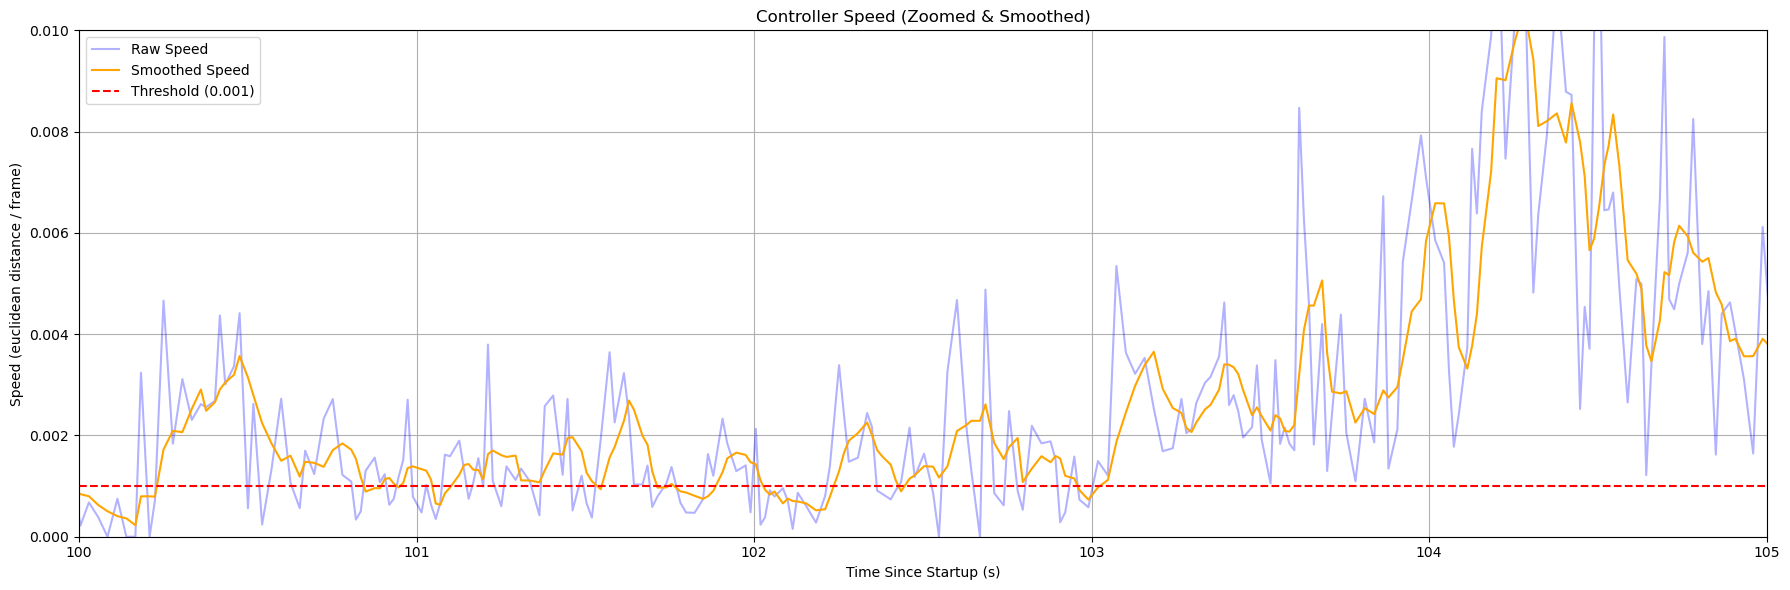

In [66]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(100, 105)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

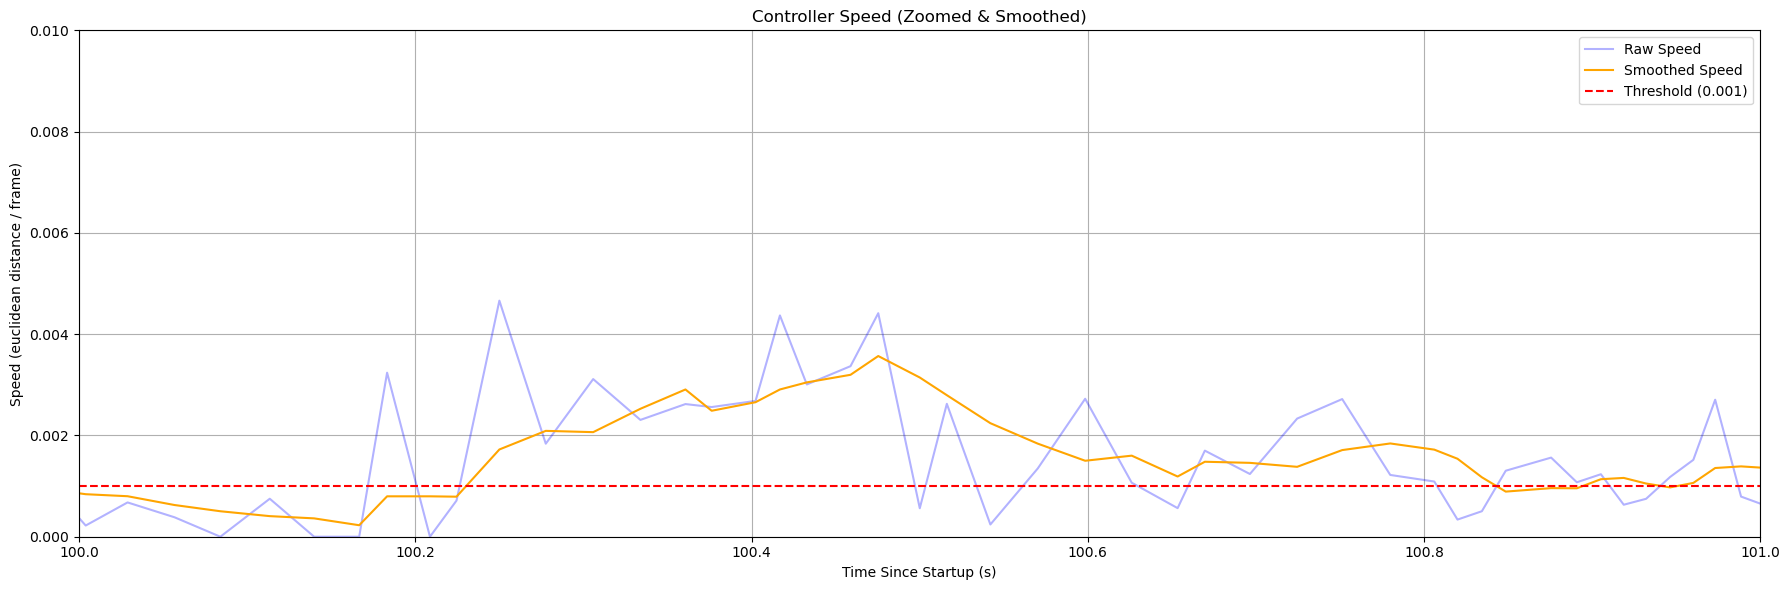

In [67]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

# Threshold
plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(100, 101)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
offset_sec = 22.1
df['time_sec_aligned'] = df['TimeSinceStartup'] - offset_sec

print(df[['TimeSinceStartup', 'time_sec_aligned']].head())

   TimeSinceStartup  time_sec_aligned
0           0.00000         -22.10000
1           0.02000         -22.08000
2           0.35333         -21.74667
3           0.59119         -21.50881
4           0.61845         -21.48155


In [69]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000
2,3,0.35333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.74667
3,4,0.59119,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.50881
4,5,0.61845,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.48155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,0.87111,...,0.00000,0.00000,0.00000,0.000000,0.00008,-0.00002,-0.00002,0.000085,0.000000,203.34610
10716,10717,225.46130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,0.87111,...,0.00000,0.00000,0.00000,0.000000,0.00013,0.00001,-0.00001,0.000131,0.000000,203.36130
10717,10718,225.48800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,0.87111,...,0.00000,0.00000,0.00000,0.000000,0.00004,0.00008,-0.00001,0.000090,0.000000,203.38800
10718,10719,225.50510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,0.87111,...,0.00000,0.00000,0.00000,0.000000,0.00015,0.00006,-0.00004,0.000166,0.000000,203.40510


In [70]:
df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum()

ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

In [71]:
print("Missing values:")
print(df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].isna().sum())

print("\nZero values:")
print((df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']] == 0).sum())

diff = df[['ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].diff()

diff['jump'] = np.sqrt(diff['ControllerPosX']**2 + diff['ControllerPosY']**2 + diff['ControllerPosZ']**2)

threshold = 1.0
outlier_frames = df.loc[diff['jump'] > threshold]

print(f"\nNumber of frames with jump > {threshold} m: {len(outlier_frames)}")

print("\nExample potential outliers:")
print(outlier_frames[['FrameNumber', 'ControllerPosX', 'ControllerPosY', 'ControllerPosZ']].head())

Missing values:
ControllerPosX    0
ControllerPosY    0
ControllerPosZ    0
dtype: int64

Zero values:
ControllerPosX    69
ControllerPosY    52
ControllerPosZ    52
dtype: int64

Number of frames with jump > 1.0 m: 9

Example potential outliers:
      FrameNumber  ControllerPosX  ControllerPosY  ControllerPosZ
1354         1355         0.00000        -0.01964         0.04598
1360         1361         0.59332         0.95025         0.02349
6034         6035         0.00000        -0.01964         0.04598
6037         6038         0.55018         0.89902        -0.16970
6148         6149         0.00000        -0.01964         0.04598


In [72]:
if 'time_sec_offset' in df.columns:
    df= df.drop(columns=['time_sec_offset'])

time_sec_offset = df['TimeSinceStartup'] - 20.1

time_idx = df.columns.get_loc('TimeSinceStartup')

df.insert(time_idx + 1, 'time_sec_offset', time_sec_offset)

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000
2,3,0.35333,-19.74667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.74667
3,4,0.59119,-19.50881,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.50881
4,5,0.61845,-19.48155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.48155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,205.34610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,...,0.00000,0.00000,0.00000,0.000000,0.00008,-0.00002,-0.00002,0.000085,0.000000,203.34610
10716,10717,225.46130,205.36130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,...,0.00000,0.00000,0.00000,0.000000,0.00013,0.00001,-0.00001,0.000131,0.000000,203.36130
10717,10718,225.48800,205.38800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,...,0.00000,0.00000,0.00000,0.000000,0.00004,0.00008,-0.00001,0.000090,0.000000,203.38800
10718,10719,225.50510,205.40510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,...,0.00000,0.00000,0.00000,0.000000,0.00015,0.00006,-0.00004,0.000166,0.000000,203.40510


In [73]:
df2 = pd.read_csv("hand_lable_01-test-02.csv")

print("Shape:", df.shape)
df2

Shape: (10720, 27)


,Observation id,Observation date,Description,Observation duration,Observation type,Source,Time offset (s),Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,lift,NaN,START,10.300,D:/Data Science/UOB/DS_project/Prototype/01-te...,618,NaN,NaN
1,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,lift,NaN,STOP,11.350,D:/Data Science/UOB/DS_project/Prototype/01-te...,681,NaN,NaN
2,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,hold,NaN,START,11.367,D:/Data Science/UOB/DS_project/Prototype/01-te...,682,NaN,NaN
3,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,hold,NaN,STOP,24.617,D:/Data Science/UOB/DS_project/Prototype/01-te...,1477,NaN,NaN
4,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,press,NaN,START,24.633,D:/Data Science/UOB/DS_project/Prototype/01-te...,1478,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,rotate,NaN,STOP,202.483,D:/Data Science/UOB/DS_project/Prototype/01-te...,12149,NaN,NaN
272,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,place,NaN,START,202.500,D:/Data Science/UOB/DS_project/Prototype/01-te...,12150,NaN,NaN
273,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,place,NaN,STOP,203.583,D:/Data Science/UOB/DS_project/Prototype/01-te...,12215,NaN,NaN
274,01-test-01,2025-07-27 16:14:32.599,NaN,203.7,Media file(s),player #1:D:/Data Science/UOB/DS_project/Proto...,0.0,214.033,60.0,NaN,other,NaN,START,203.600,D:/Data Science/UOB/DS_project/Prototype/01-te...,12216,NaN,NaN


In [74]:
df_sub = df2[['Behavior', 'Behavior type', 'Time', 'Image index']]

df_start = df_sub[df_sub['Behavior type'] == 'START'].copy()
df_stop  = df_sub[df_sub['Behavior type'] == 'STOP'].copy()

df_start = df_start.reset_index(drop=True)
df_stop  = df_stop.reset_index(drop=True)

df_events = pd.DataFrame({
    'behavior': df_start['Behavior'],
    'start_time': df_start['Time'],
    'stop_time': df_stop['Time'],
    'start_image_index': df_start['Image index'],
    'stop_image_index': df_stop['Image index']
})

df_events

,behavior,start_time,stop_time,start_image_index,stop_image_index
0,lift,10.300,11.350,618,681
1,hold,11.367,24.617,682,1477
2,press,24.633,24.833,1478,1490
3,hold,24.850,25.050,1491,1503
4,press,25.067,25.800,1504,1548
...,...,...,...,...,...
133,press,199.633,200.200,11978,12012
134,hold,200.217,200.450,12013,12027
135,rotate,200.467,202.483,12028,12149
136,place,202.500,203.583,12150,12215


In [75]:
df['behavior'] = np.nan

for _, row in df_events.iterrows():
    b = row['behavior']
    t_start = row['start_time']
    t_stop = row['stop_time']

    mask = (df['time_sec_offset'] >= t_start) & (df['time_sec_offset'] <= t_stop)

    df.loc[mask, 'behavior'] = b

df

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_29407/3175346181.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'lift' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'behavior'] = b


,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.10000,NaN
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000,NaN
2,3,0.35333,-19.74667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.74667,NaN
3,4,0.59119,-19.50881,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.50881,NaN
4,5,0.61845,-19.48155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-21.48155,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,205.34610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,...,0.00000,0.00000,0.000000,0.00008,-0.00002,-0.00002,0.000085,0.000000,203.34610,other
10716,10717,225.46130,205.36130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,...,0.00000,0.00000,0.000000,0.00013,0.00001,-0.00001,0.000131,0.000000,203.36130,other
10717,10718,225.48800,205.38800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,...,0.00000,0.00000,0.000000,0.00004,0.00008,-0.00001,0.000090,0.000000,203.38800,other
10718,10719,225.50510,205.40510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,...,0.00000,0.00000,0.000000,0.00015,0.00006,-0.00004,0.000166,0.000000,203.40510,other


In [76]:
print(df['behavior'].value_counts(dropna=False))

behavior
rotate    3027
hold      2271
press     1758
NaN       1626
adjust    1393
other      544
place       52
lift        49
Name: count, dtype: int64


In [77]:
df[(df['time_sec_offset'] <= 67.633)][['TimeSinceStartup', 'time_sec_offset', 'behavior']]

,TimeSinceStartup,time_sec_offset,behavior
0,0.00000,-20.10000,NaN
1,0.02000,-20.08000,NaN
2,0.35333,-19.74667,NaN
3,0.59119,-19.50881,NaN
4,0.61845,-19.48155,NaN
...,...,...,...
4170,87.64259,67.54259,rotate
4171,87.66969,67.56969,rotate
4172,87.68504,67.58504,rotate
4173,87.69997,67.59997,rotate


In [78]:
df['ControllerPosX_adjusted'] = df['ControllerPosX'] - 0.041480
df['ControllerPosY_adjusted'] = df['ControllerPosY'] - 0.172508
df['ControllerPosZ_adjusted'] = df['ControllerPosZ'] 

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior,ControllerPosX_adjusted,ControllerPosY_adjusted,ControllerPosZ_adjusted
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,-22.10000,NaN,-0.04148,-0.172508,0.00000
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-22.08000,NaN,-0.04148,-0.172508,0.00000
2,3,0.35333,-19.74667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-21.74667,NaN,-0.04148,-0.172508,0.00000
3,4,0.59119,-19.50881,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-21.50881,NaN,-0.04148,-0.172508,0.00000
4,5,0.61845,-19.48155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.000000,NaN,-21.48155,NaN,-0.04148,-0.172508,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,205.34610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,...,0.00008,-0.00002,-0.00002,0.000085,0.000000,203.34610,other,0.82963,0.808232,0.20343
10716,10717,225.46130,205.36130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,...,0.00013,0.00001,-0.00001,0.000131,0.000000,203.36130,other,0.82963,0.808232,0.20343
10717,10718,225.48800,205.38800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,...,0.00004,0.00008,-0.00001,0.000090,0.000000,203.38800,other,0.82963,0.808232,0.20343
10718,10719,225.50510,205.40510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,...,0.00015,0.00006,-0.00004,0.000166,0.000000,203.40510,other,0.82963,0.808232,0.20343


In [79]:
quat_offset = [-0.08587309, 0.20400344, 0.67655363, 0.70234151]
r_offset = R.from_quat(quat_offset)

def apply_rotation_offset(row):
    quat_proto = [row['ControllerRotX'], row['ControllerRotY'], row['ControllerRotZ'], row['ControllerRotW']]
    r_proto = R.from_quat(quat_proto)
    r_aligned = r_offset * r_proto
    return pd.Series(r_aligned.as_quat(), index=['AlignedRotX', 'AlignedRotY', 'AlignedRotZ', 'AlignedRotW'])

aligned_rotations = df.apply(apply_rotation_offset, axis=1)

df_proto_aligned = pd.concat([df.reset_index(drop=True), aligned_rotations], axis=1)

In [80]:
df = df_proto_aligned

df

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,controller_speed_smooth,time_sec_aligned,behavior,ControllerPosX_adjusted,ControllerPosY_adjusted,ControllerPosZ_adjusted,AlignedRotX,AlignedRotY,AlignedRotZ,AlignedRotW
0,1,0.00000,-20.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-22.10000,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
1,2,0.02000,-20.08000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-22.08000,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
2,3,0.35333,-19.74667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-21.74667,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
3,4,0.59119,-19.50881,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-21.50881,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
4,5,0.61845,-19.48155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,-21.48155,NaN,-0.04148,-0.172508,0.00000,-0.085873,0.204003,0.676554,0.702342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10716,225.44610,205.34610,0.03397,1.19320,0.18771,0.14199,-0.23901,0.04447,0.95955,...,0.000000,203.34610,other,0.82963,0.808232,0.20343,-0.147748,0.059332,0.061350,0.985336
10716,10717,225.46130,205.36130,0.03410,1.19321,0.18770,0.14212,-0.23880,0.04435,0.95959,...,0.000000,203.36130,other,0.82963,0.808232,0.20343,-0.147750,0.059312,0.061325,0.985338
10717,10718,225.48800,205.38800,0.03414,1.19329,0.18769,0.14212,-0.23871,0.04463,0.95960,...,0.000000,203.38800,other,0.82963,0.808232,0.20343,-0.147765,0.059299,0.061329,0.985337
10718,10719,225.50510,205.40510,0.03429,1.19335,0.18765,0.14237,-0.23867,0.04500,0.95955,...,0.000000,203.40510,other,0.82963,0.808232,0.20343,-0.147770,0.059322,0.061339,0.985334


In [81]:
df.to_csv("controller_with_aligned_time_01-test-02.csv", index=False)